In [1]:
#These 2 lines automatically update the Jupyter notebook with the latest Python files you have imported so
#you do not have to restart the Jupyter notebook every time you make a change. 
%load_ext autoreload 
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from dsp_toolbox import dft, apply_dft_matrix, create_dft_matrix, plot_dft_magnitude_angle, idft, convolve_signals, zero_pad_signal
from utils import visualize_dft_matrix, generate_gaussian_kernel

# 1. Numpy and Matplotlib Python Libraries Primer

In [2]:
N = 32 # Number of samples in the signal
t_indices = np.arange(0,N) # This creates the time series indices.

In [3]:
f = 2/N #Frequency of the signal
y_signal = np.sin(2*np.pi*f*t_indices) #Creating the signal by inputting the temporal indices

In [4]:
# Often when things go wrong with your code, its useful to inspect the variables
# One way we can do this is by printing the parameters of the variables. With numpy this is easy!
size_of_T_array = t_indices.shape
size_of_Y_array = y_signal.shape
print(f"Size of <size_of_T_array> is: {size_of_T_array}")
print(f"Size of <size_of_Y_array> is: {size_of_T_array}")
print(f"Value of 4th item in <y_signal> is: {y_signal[3]}")
print(f"Values of 2nd through 5th items in <y_signal> is: {y_signal[1:6]}")

Size of <size_of_T_array> is: (32,)
Size of <size_of_Y_array> is: (32,)
Value of 4th item in <y_signal> is: 0.9238795325112867
Values of 2nd through 5th items in <y_signal> is: [0.38268343 0.70710678 0.92387953 1.         0.92387953]


Text(0.5, 0, 'Sample Number (n)')

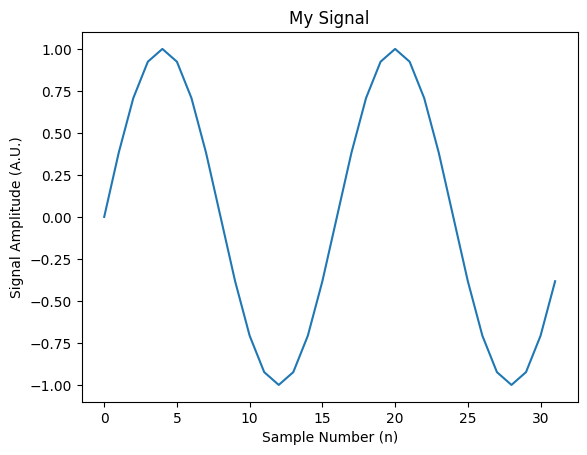

In [5]:
# Plotting a signal
plt.figure()
plt.plot(t_indices, y_signal)
plt.title("My Signal")
plt.ylabel("Signal Amplitude (A.U.)")
plt.xlabel("Sample Number (n)")

# 2. DFT Basics

## 2.1 Create the DFT Matrix
In this section, find the <create_dft_matrix> function in dsp_toolbox.py and implement the function.

In [6]:
M = 16 #Do not change this value.
dft_mat = create_dft_matrix(length = M)

We can visualize the matrix using the [visualize_dft_matrix] function, which plots each row of the matrix and seperates the real and imaginary components. Check the implementation for more information.

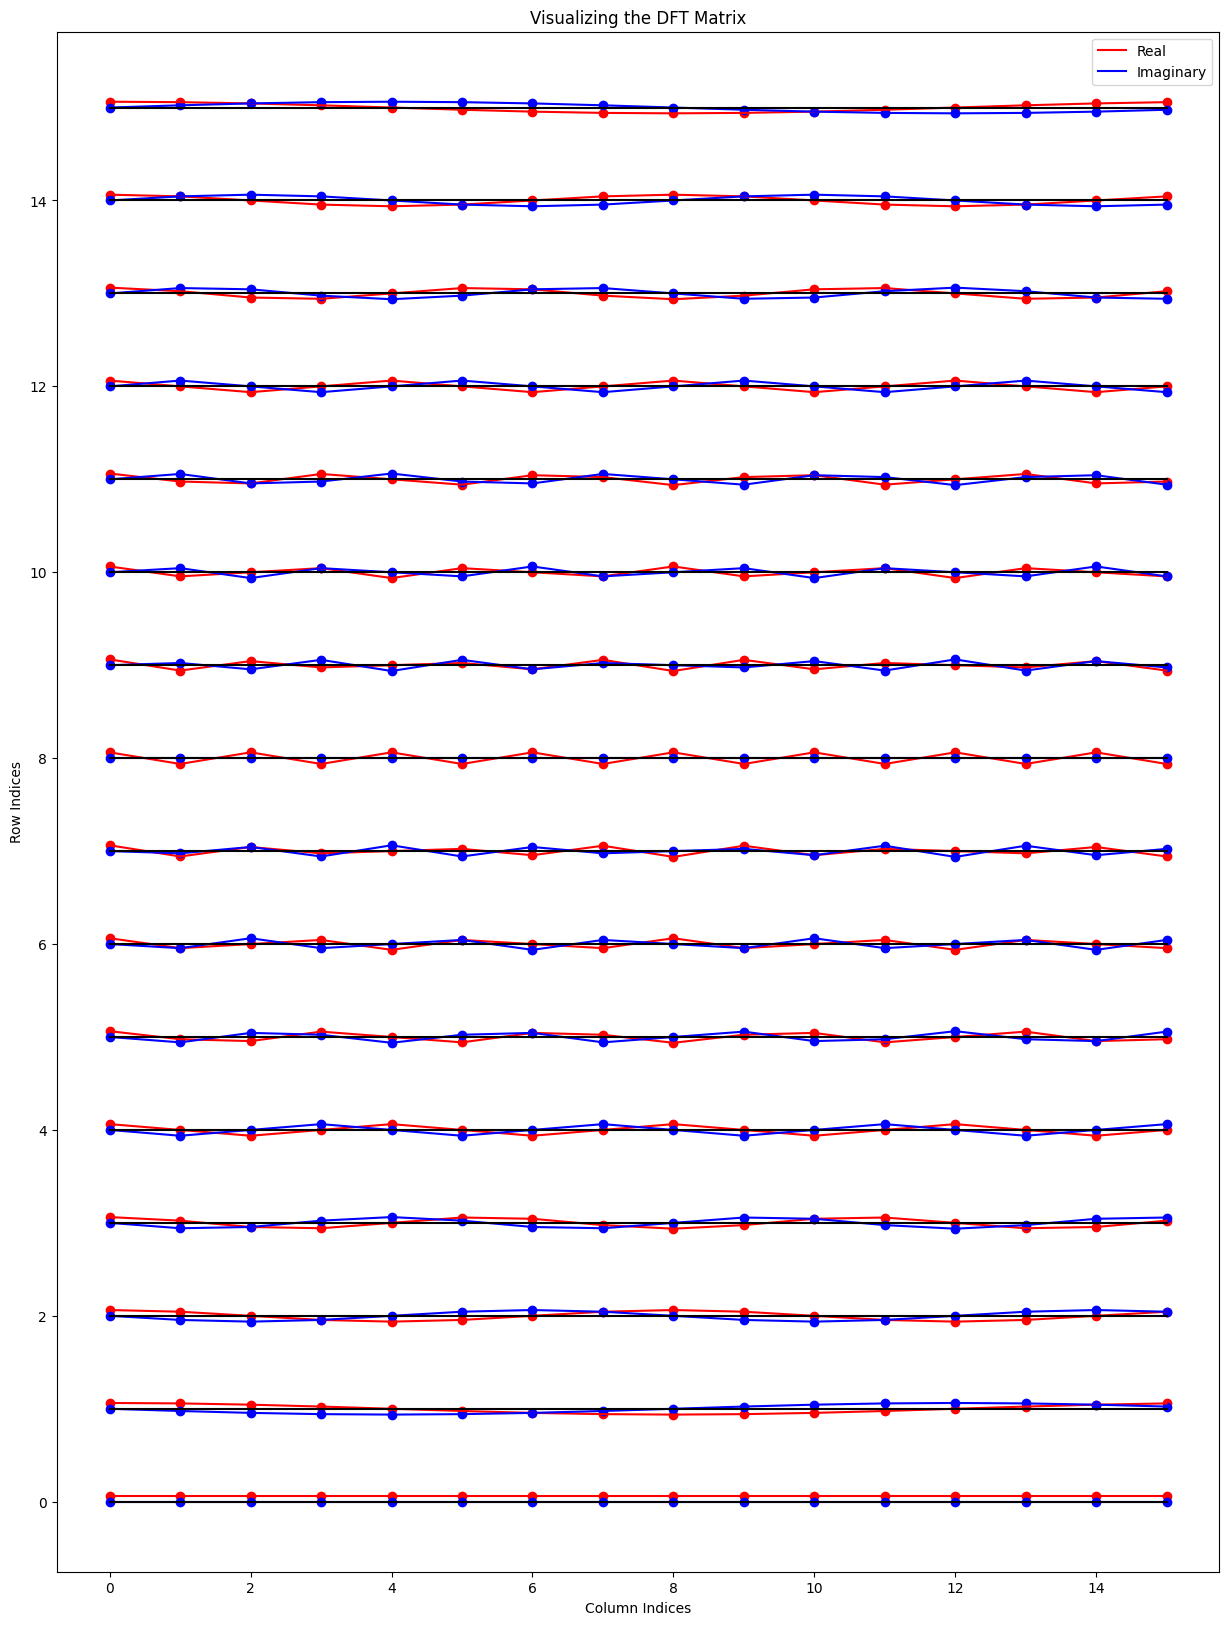

In [7]:
visualize_dft_matrix(dft_mat)

Q1: What is an interesting property you can see of this matrix by looking at the plots?

Answer: The matrix is symmetric

## 2.2 Take the DFT of a Signal

Implement the <apply_dft_matrix> function in the dsp_toolbox.py file and run the remaining cells in this section.

In [8]:
Fy_signal = dft(y_signal)

Text(0.5, 0, 'Frequency Bins')

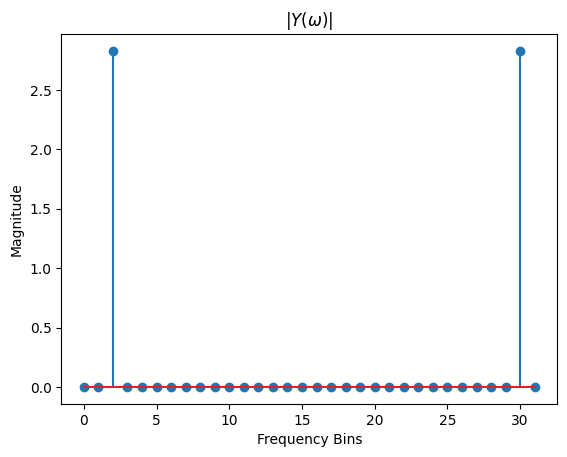

In [9]:
plt.stem(np.abs(Fy_signal))
plt.title(r"$|Y(\omega)|$")
plt.ylabel("Magnitude")
plt.xlabel("Frequency Bins")

Q2: Explain why the DFT Plot appears the way it does (why are there only two non-zero points)?

Answer: because $\sin(t)=\frac{1}{2j}(e^{jt}-e^{-jt})$ So therefore the DFT would be two delta functions

Q3: Inspect the values of the non-zero locations of the DFT of the signal, are they real, imaginary, both? Why?

Answer: Their imaginary because the signal can be written as two exponetials multiplied by an imaginary constant

## 2.3 Plotting and Visualizing the DFT

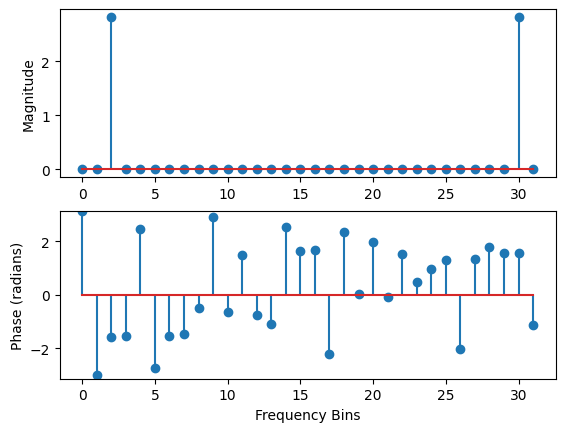

In [10]:
plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, format=None)

Q4: You may notice that the Phase Plot looks non-sensical, why would that be the case?

Answer: Very small values for all the values of the DFT that is supposed to be 0 because of rounding error

You will often come across different ways of plotting the DFT. Please implement these forms in the following blocks by changing the [plot_dft_magnitude_angle] function and the input parameter [format].

### 2.3.1 Set the phase to zero if any point in the DFT is less than some very small value (e.g. 1e-4)

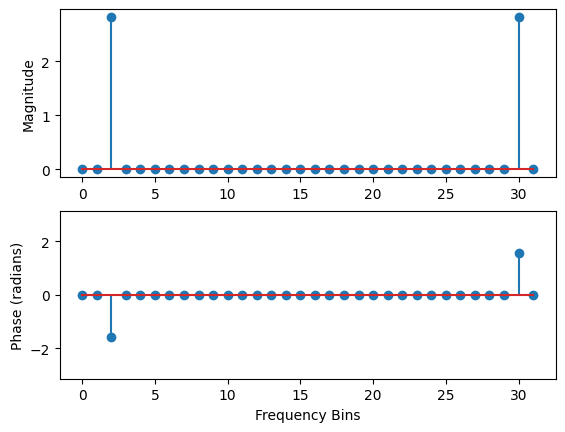

In [11]:
plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, format="ZeroPhase")

### 2.3.2 Plot DFT such that the Frequency axis is normalized between [0, 1]

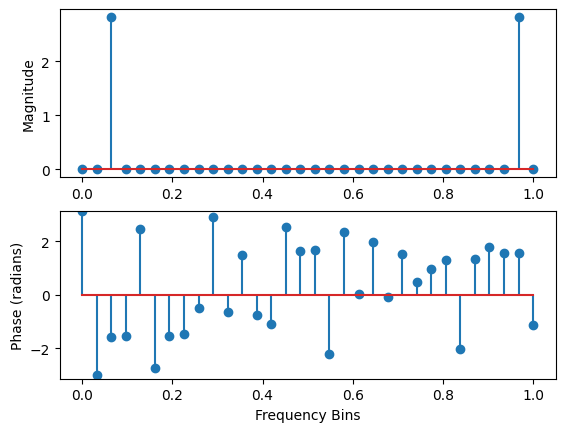

In [12]:
plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, format="Normalized")

### 2.3.3 Plot DFT such that the Frequency axis is normalized between [-0.5, 0.5]

Hint: This will require shifting indices around.

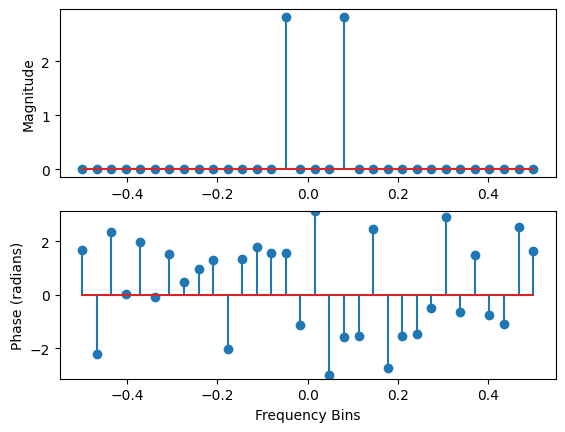

In [13]:
plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, format="Centered_Normalized")

## 2.4 The inverse DFT

Implement the [idft] function by reusing functions you have already implemented.

In [14]:
reconstructed_y_signal = idft(Fy_signal)

/home/lawrence/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'Sample Number (n)')

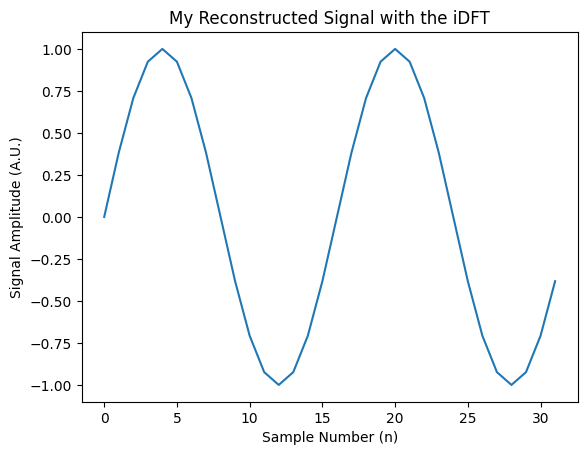

In [15]:
plt.figure()
plt.plot(t_indices, reconstructed_y_signal)
plt.title("My Reconstructed Signal with the iDFT")
plt.ylabel("Signal Amplitude (A.U.)")
plt.xlabel("Sample Number (n)")

In [16]:
# Lets check the difference between the two signals by computing the L2 distance between them
# If this is much less than 1e-4 than we have done the idft correctly.
l2_dist = np.sqrt(np.sum(np.square(np.abs(reconstructed_y_signal - y_signal))))
print(f"The L2 distance between the 2 signals is: {l2_dist}")

The L2 distance between the 2 signals is: 2.8840931316822616e-14


# 3. Properties of the DFT

## 3.1 Leakage in Spectrum

Text(0.5, 0, 'Sample Number (n)')

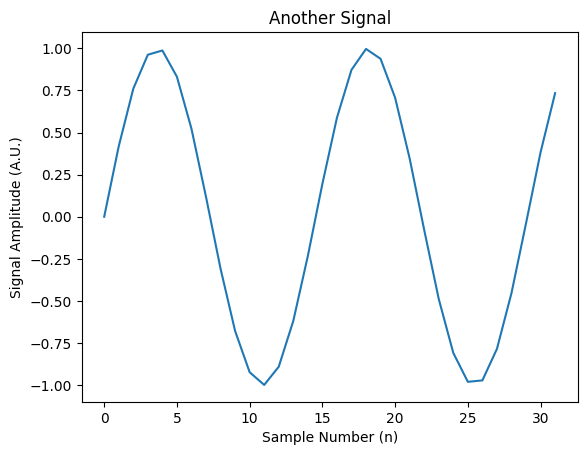

In [17]:
N = 32 # Number of samples in the signal
t_indices = np.arange(0,N) # This creates the time series indices.
f = 2.2/N #Frequency of the signal
y_leaky_signal = np.sin(2*np.pi*f*t_indices) #Creating the signal by giving the temporal indices

plt.figure()
plt.plot(t_indices, y_leaky_signal)
plt.title("Another Signal")
plt.ylabel("Signal Amplitude (A.U.)")
plt.xlabel("Sample Number (n)")

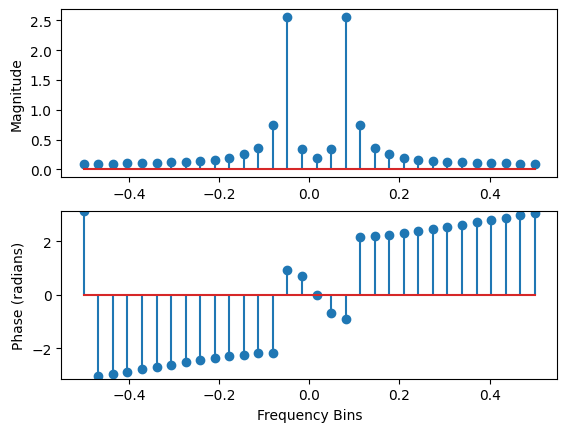

In [18]:
Fy_leak_signal = dft(y_leaky_signal)
plot_dft_magnitude_angle(np.arange(N) , Fy_leak_signal, format="Centered_Normalized")

Q5: The frequency used to generate the sinusoidal signal is similar to the one used in Part 1. Then why does the frequency spectrum look like this?

Answer: Because the frequencies will leak since the original frequency of the signal is not an integer multiple of the sampling frequency

## 3.2 Frequency Resolution

### 3.2.1 Rescaling the X-axis

Modify the plot function to rescale the X-axis to plot the spectrum w.r.t the original frequency limits (Modify the "centered" case to obtain the rescaled plots). For example, if the sampling frequency is 8000Hz, then the x-axis should be [-4000Hz,4000Hz]

Use the key-word argument [fs] to specify the sampling frequency. We'll call this [format="Centered_Original_Scale"]. 

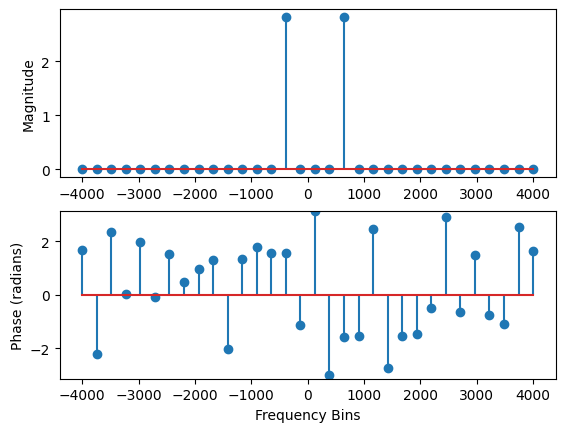

In [19]:
fs = 8000 # Don't alter this value. This is the sampling frequency
plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, fs=8000, format="Centered_Original_Scale")

Q6: Given the sampling frequency [fs], the number of samples [N] and the index [i] of the spectral peak of a sinusoid, how do you calculate the frequency of the sinusoid prior to sampling.

Ans: 

Q7: Now that we know how to find the sinusoid's original frequency, we want to find how precise these estimations are. How do you find the frequncy resoltuion of the frequency spectrum? Given the mathematical formula for this value, give the sampling frequency <fs> and the number of samples <N>.<br/>
(Hint: Use the same logic as the previous question to derive the formula, but don't factor in the spectral peak in your formulation)

Ans: *[fill it here]*

Q8: Given the frequency resolution, consider the following scenario: I have 2 sinusoids whose frequency difference is less than the resolution limit, i.e. ($f_{S1} - f_{S2} < $ resolution_limit). What would the frequency spectrum of $y[n] = x_{S1}[n] + x_{S2}[n]$ look like? Can we distinguish these frequncies? If yes, explain how we can distinguish the 2 peaks. If no, please propose a solution to resolve the peaks.

Ans: 

## 3.2.2 Zero-Padding

Implement the [zero_pad_signal] function in the [dsp_toolbox_sol.py] file. Then see how zero-padding a signal affects its DFT.

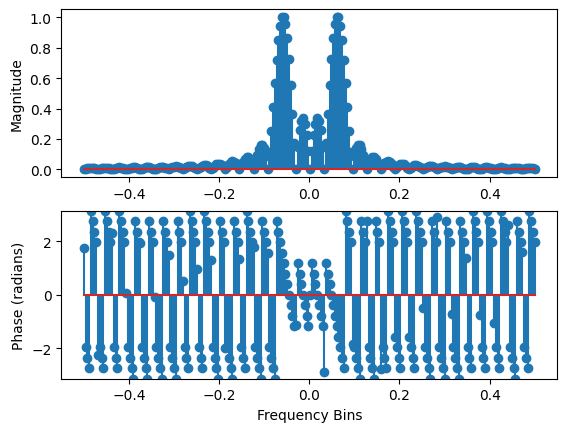

In [20]:
new_N = 256
y_signal_padded = zero_pad_signal(y_signal, new_N)
plot_dft_magnitude_angle(np.arange(new_N), f_signal=dft(y_signal_padded), fs=8000, format="Centered_Normalized") # Centered_Original_Scale, Centered_Normalized 

Q9: Why does the DFT of the zero-padded function look different than the the DFT of the original function?

Ans: Cause the signal is diffrent since it is now zero padded.

## 3.2.3 Resolving 2 Frequencies

We have created a signal, [new_y_signal] which is a combination of 2 sinusoids that have similar frequencies. Edit the parameter [new_n] until you can see 2 distinct frequencies in the frequency domain.

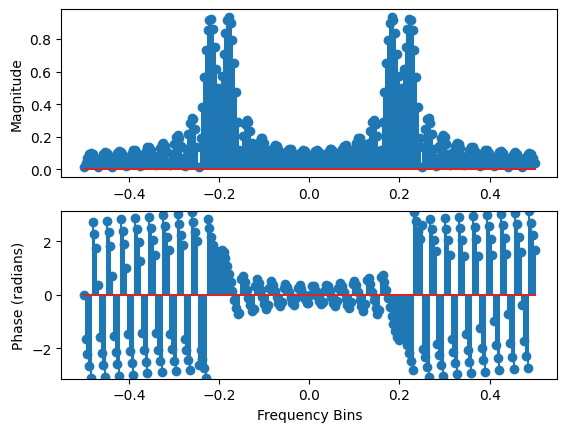

In [21]:
#***************************** Change the parameter under this line *****************************
new_N = 256
#***************************** Change the parameter above this line *****************************
f1 = 6/N
f2 = 6.8/N
new_y_signal = np.sin(2*np.pi*f1*t_indices) + np.sin(2*np.pi*f2*t_indices)
new_y_signal_padded = zero_pad_signal(new_y_signal, new_N)
plot_dft_magnitude_angle(np.arange(new_N), f_signal=dft(new_y_signal_padded), fs=8000, format="Centered_Normalized")

Q10: What parameter [new_N] did you select?

Ans: `N=256`

## 3.3 Convolution

In this section we will implement convolution with the DFT. Our two signal of interest are x[n], a Sinc function, and y[n], a Gaussian function. We want to produce z[n] = x[n] * y[n].

Text(0.5, 0, 'Sample Number (n)')

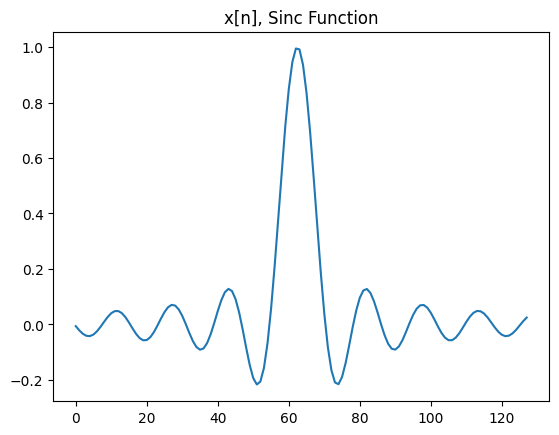

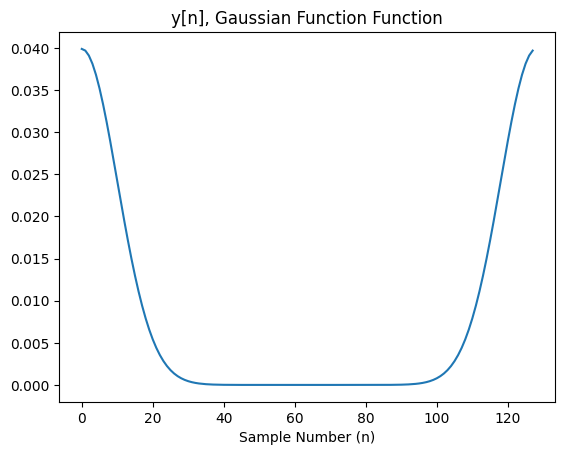

In [22]:
N = 128
t = np.arange(N)
x = np.sin(0.4*(t-N/2.05))/(0.4*(t-N/2.05))

std = 10
y = generate_gaussian_kernel(std, N)

plt.figure()
plt.plot(t, x)
plt.title("x[n], Sinc Function")
plt.figure()
plt.plot(t, y)
plt.title("y[n], Gaussian Function Function")
plt.xlabel("Sample Number (n)")

Implement the function [convolve_signals] located in the [dsp_toolbox.py] file and then run the cell below.

Text(0.5, 0, 'Sample Number (n)')

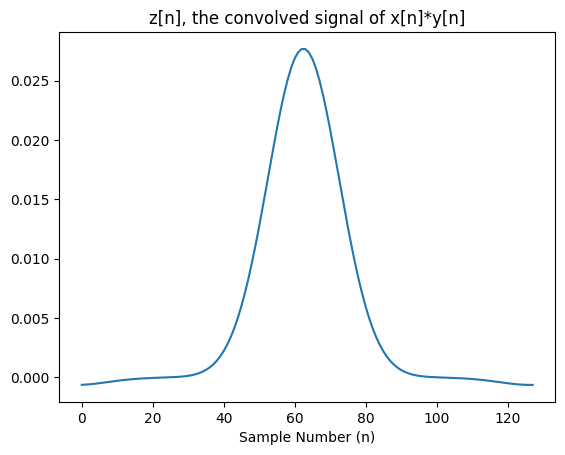

In [23]:
z_signal = convolve_signals(x, y)

plt.plot(z_signal)
plt.title("z[n], the convolved signal of x[n]*y[n]")
plt.xlabel("Sample Number (n)")

### 3.3.1 Removing Noise

We have now added noise to the original sinc function x[n] thus producing x_noise[n]. Let's try to pick a Gaussian function that will reduce the amount of noise in the signal. You will do this by adjusting the parameter [std], or the standard deviation of the Gaussian Function.

You can see how well you do with the comparison plot or by seeing how low you can make the L2 error between the original and filtered signal go.

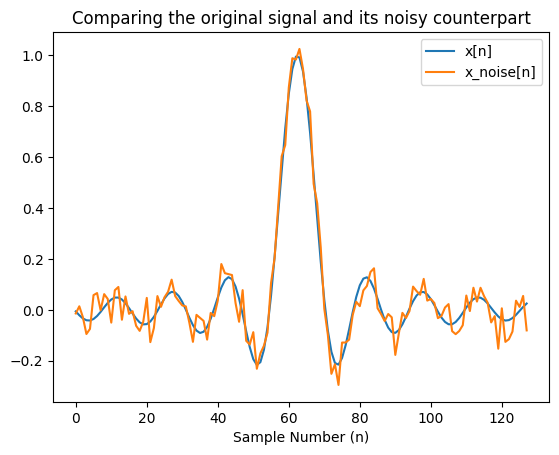

In [24]:
N = 128
t = np.arange(N)

noise = np.random.normal(loc=0, scale=0.05, size=N)
x_noise = np.sin(0.4*(t-N/2.05))/(0.4*(t-N/2.05)) + noise

plt.figure()
plt.plot(t, x, label = "x[n]")
plt.plot(t, x_noise, label = "x_noise[n]")
plt.title("Comparing the original signal and its noisy counterpart")
plt.xlabel("Sample Number (n)")
plt.legend()

Text(0.5, 0, 'Sample Number (n)')

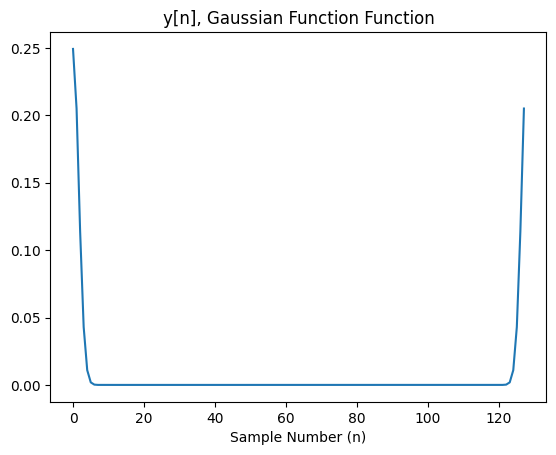

In [25]:
#***************************** Change the parameter under this line *****************************
#Try using parameters between 0.01 to 100
std = 1.6
#***************************** Change the parameter above this line *****************************
y = generate_gaussian_kernel(std, N)
plt.figure()
plt.plot(t, y)
plt.title("y[n], Gaussian Function Function")
plt.xlabel("Sample Number (n)")

The L2 distance between the Noisy and Original Signal is: 0.5543062726351187
The L2 distance between the Filtered and Original signals is: 0.28507420716107


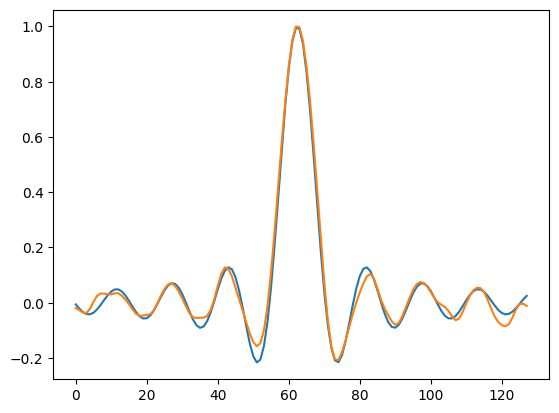

In [26]:
z_filtered_signal = convolve_signals(x_noise, y)
z_filtered_signal = z_filtered_signal / np.max(z_filtered_signal) #normalizing the filtered signal

plt.plot(x)
plt.plot(z_filtered_signal)
l2_dist_original = np.sqrt(np.sum(np.square(np.abs(x_noise - x))))
print(f"The L2 distance between the Noisy and Original Signal is: {l2_dist_original}")
l2_dist_now = np.sqrt(np.sum(np.square(np.abs(z_filtered_signal - x))))
print(f"The L2 distance between the Filtered and Original signals is: {l2_dist_now}")

Q11: What parameter [std] did you select to attenuate noise and what was the improvement in error?

Ans: `std=1.6` resulting in a reduction of L2 distance from 0.5543062726351187 to 0.28507420716107

### 3.3.2 Analyze the Noisy and Filtered Signal in the Frequency Domain

Plot and analyze the functions in this section, the first one has been done for you.

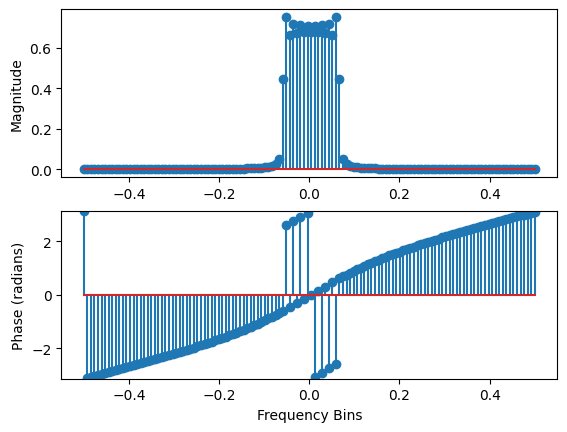

In [27]:
#0. Convert the original signal to the frequency domain via the DFT 
# and visualize it with your previously written plotting functions.

#***************************** Add your implementation under this line *****************************
plot_dft_magnitude_angle(np.arange(N), dft(x), format="Centered_Normalized") #This has been done for you already.
#***************************** Add your implementation above this line *****************************

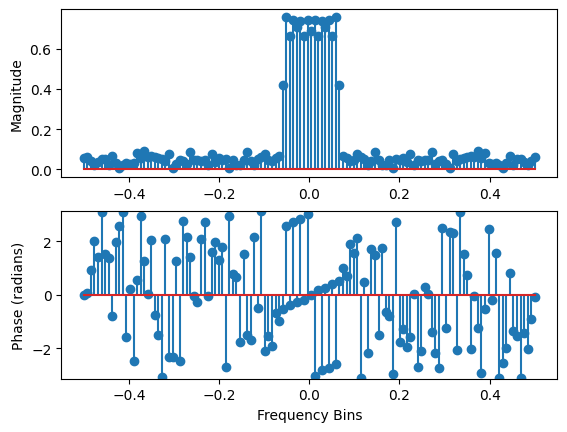

In [28]:
#1. Convert the noisy signal to the frequency domain via the DFT 
# and visualize it with your previously written plotting functions.

#***************************** Add your implementation under this line *****************************
plot_dft_magnitude_angle(np.arange(N), dft(x_noise), format="Centered_Normalized")

#***************************** Add your implementation above this line *****************************

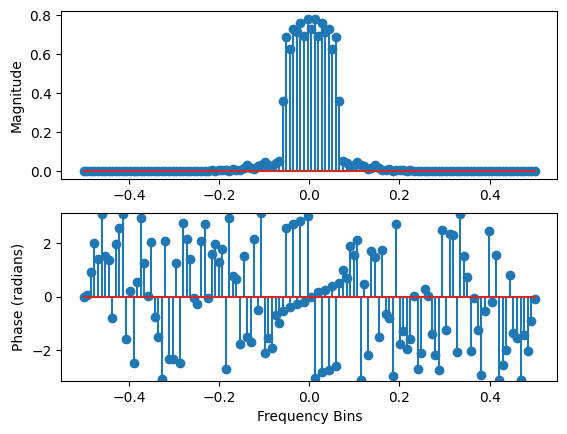

In [29]:
#2. Convert the filtered signal to the frequency domain via the DFT 
# and visualize it with your previously written plotting functions.

#***************************** Add your implementation under this line *****************************
plot_dft_magnitude_angle(np.arange(N), dft(z_filtered_signal), format="Centered_Normalized")
#***************************** Add your implementation above this line *****************************

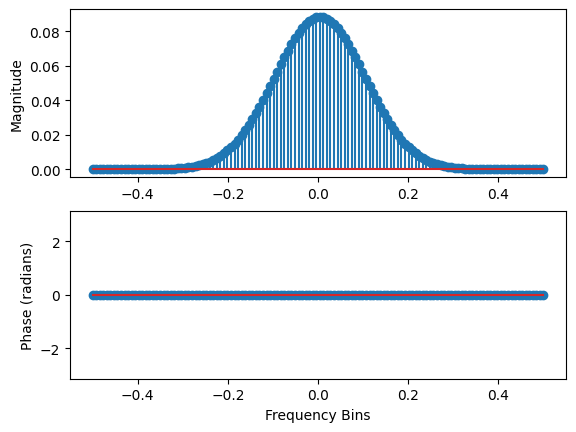

In [30]:
#3. Convert the Gaussian signal to the frequency domain via the DFT 
# and visualize it with your previously written plotting functions.

#***************************** Add your implementation under this line *****************************
plot_dft_magnitude_angle(np.arange(N), dft(y), format="Centered_Normalized")

#***************************** Add your implementation above this line *****************************

Q12: Compare and contrast the frequency spectrums of the noisy and the filtered Signal:

Ans: The frequency spectrum of the filtered Signal has less high frequency components than the noisy signal

Q13: Why does the filtered signal's spectrum make sense when compared with the Gaussian signal's frequency spectrum?

Ans: It makes sense since the Gaussian is pretty much a bandpass filter that isolates the lower frequencies